**Nama**    : Johnson Rouslie Junior\
**Kelas**   : PYTN-KS09\
**Absensi** : 003

# Import Library

In [235]:
import pandas as pd
import numpy as np
import statistics
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(5,5)})

# Read CSV

In [184]:
df = pd.read_csv("dataset/nyc-rolling-sales.csv")
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Exploratory & Cleaning Data

Sesuai apa yang sudah diinfokan melalui tugas dan juga dari dataset [NYC Property Sales di Kaggle](https://www.kaggle.com/datasets/new-york-city/nyc-property-sales?datasetId=2648), ubah value pada BOROUGH menjadi sebuah string nama BOROUGH berdasarkan valuenya. Gunanya adalah agar value pada data tersebut bisa lebih mudah dibaca.

In [185]:
df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'
df['BOROUGH'][df['BOROUGH'] == 2] = 'Bronx'
df['BOROUGH'][df['BOROUGH'] == 3] = 'Brooklyn'
df['BOROUGH'][df['BOROUGH'] == 4] = 'Queens'
df['BOROUGH'][df['BOROUGH'] == 5] = 'Staten Island'
df.head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18096\4211988922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BOROUGH'][df['BOROUGH'] == 1] = 'Manhattan'


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Sekarang akan dicek ada kolom apa saja yang ada didalam dataset ini dan jenis nilai yang tersimpan didalam kolom tersebut.

In [186]:
pd.set_option('display.max_columns',999)
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [187]:
df.columns.values

array(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER',
       'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'], dtype=object)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  object
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

Dari hasil tersebut bisa dilihat bahwa ada kolom bernama "Unnamed: 0" yang tidak jelas kegunaannya untuk apa dan ada juga kolom bernama "EASE-MENT" yang tidak memiliki value sama sekali didalamnya. Oleh sebab itu kedua kolom ini akan di drop terlebih dahulu sebelum dibahas permasalahan lain pada dataset ini.

In [189]:
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
df.head(1)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00


In [190]:
df.shape

(84548, 20)

2 kolom sudah sukses terhapus dari tabel data tersebut. Beberapa kolom pada tabel data tersebut memiliki tipe yang salah seperti misalnya "SALE PRICE" dimana memiliki tipe object yang harus bertipe numeric atau int64. Oleh sebab itu akan dilakukan perubahan tipe data pada tiap kolom dengan tipe data yang salah.

In [191]:
df['BOROUGH'] = df['BOROUGH'].astype('string')
df['NEIGHBORHOOD'] = df['NEIGHBORHOOD'].astype('string')
df['BUILDING CLASS CATEGORY'] = df['BUILDING CLASS CATEGORY'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BUILDING CLASS AT PRESENT'] = df['BUILDING CLASS AT PRESENT'].astype('category')
df['ADDRESS'] = df['ADDRESS'].astype('string')
df['APARTMENT NUMBER'] = df['APARTMENT NUMBER'].astype('string')
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET'] = pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')
df['BUILDING CLASS AT TIME OF SALE'] = df['BUILDING CLASS AT TIME OF SALE'].astype('category')
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  string        
 1   NEIGHBORHOOD                    84548 non-null  string        
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  string        
 8   APARTMENT NUMBER                84548 non-null  string        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

Data pada tabel sudah selesai dikonversi sesuai dengan tipe data yang seharusnya. Sekarang akan dilakukan pengecekan apakah ada value yang bernilai null pada tabel data tersebut.

In [193]:
df.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26252
GROSS SQUARE FEET                 27612
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14561
SALE DATE                             0
dtype: int64

Ternyata pada "LAND SQUARE FEET", "GROSS SQUARE FEET", dan "SALE PRICE" memiliki value bernilai null. Tetapi karena ketiga kolom ini kemungkinan akan digunakan, maka diambil data - data yang tidak null dari kolom "GROSS SQUARE FEET" dikarenakan kolom ini memiliki jumlah null terbanyak dan jika setelah dibersihkan masih ada yang null maka akan dilakukan cara yang sama untuk membersihkannya dengan mengambil nilai yang tidak null dari kolom dengan jumlah null terbesar.

In [194]:
df = df[df['GROSS SQUARE FEET'].notnull()]
df = df[df['SALE PRICE'].notnull()]
df = df[df['LAND SQUARE FEET'].notnull()]
df.isnull().sum()

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [195]:
df.shape

(48244, 20)

Setelah dilakukan pembersihan nilai null, jumlah data sekarang ada sebanyak 48244 dimana sebelumnya berjumlah 84548. Meskipun hampir 50% data dihapus, tetapi data ini masih bisa layak digunakan dibandingkan data sebelumnya yang kemungkinan terdapat kesalahan penginputtan data, data tercorrupt, dan sebagainya yang membuat hasil nanti menjadi tidak akurat. Sekarang akan dilakukan pengecekan statistik sederhananya.

In [196]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,48244.000000,4.824400e+04,4.824400e+04,48244.000000,48244.000000,4.824400e+04
mean,4984.532191,234.324662,10939.681328,2.566537,0.249171,2.834632,3.358117e+03,3.669753e+03,1827.765173,1.475769,1.153281e+06
std,3427.418090,496.361521,1072.752086,17.465481,10.988072,20.750418,3.143590e+04,2.947491e+04,464.361153,0.833589,1.340131e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000e+00
25%,2206.750000,21.000000,10469.000000,1.000000,0.000000,1.000000,1.413000e+03,8.280000e+02,1920.000000,1.000000,8.042000e+04
50%,4660.500000,45.000000,11217.000000,1.000000,0.000000,1.000000,2.140000e+03,1.620000e+03,1931.000000,1.000000,4.800000e+05
75%,6996.000000,94.000000,11237.000000,2.000000,0.000000,2.000000,3.071000e+03,2.520000e+03,1961.000000,2.000000,8.300000e+05
max,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


Pada hasil describe tersebut dapat dilihat beberapa keanehan, yaitu:
1. Kolom "TOTAL UNITS" ada yang bernilai 0 yang seharusnya setiap properti memiliki total unit minimal 1
2. Kolom "LAND SQUARE FEET" ada yang bernilai 0 yang seharusnya setiap properti memiliki luas
3. Kolom "GROSS SQUARE FEET" ada yang bernilai 0 yang seharusnya setiap properti memiliki luas
4. Kolom "YEAR BUILT" ada yang bernilai 0 yang seharusnya setiap properti memiliki awal tahun pembuatan
5. Kolom "SALE PRICE" ada yang bernilai 0, kolom ini tidak sepenuhnya salah dikarenakan nilai 0 ini biasanya menandakan transfer kepemilikan properti saja.
6. Kolom "ZIP CODE" ada yang bernilai 9 yang seharusnya setiap properti memiliki zip code wilayah berdirinya properti tersebut

Data yang akan saya observasi adalah data yang memiliki nilai diatas 0, oleh sebab itu data yang bernilai 0 akan dihapus dari observasi. Tetapi data ini akan disimpan ke variabel sementara terlebih dahulu untuk berjaga - jaga apabila data berkurang drastis.

In [197]:
df_temp = df[
    (df['TOTAL UNITS'] != 0) &
    (df['LAND SQUARE FEET'] != 0) &
    (df['GROSS SQUARE FEET'] != 0) &
    (df['YEAR BUILT'] != 0) &
    (df['SALE PRICE'] != 0) &
    (df['ZIP CODE'] != 0)
       ]
df_temp.shape

(29270, 20)

Sepertinya 29270 masih merupakan jumlah data yang banyak, oleh sebab itu digunakan tabel data ini untuk menjawab pertanyaan yang akan dibahas di bagian berikutnya.

In [198]:
df = df_temp
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,29270.000000,29270.000000,29270.000000,29270.000000,29270.000000,29270.000000,2.927000e+04,2.927000e+04,29270.000000,29270.000000,2.927000e+04
mean,5550.708097,61.181654,10997.383123,3.054493,0.329757,3.382849,4.204053e+03,4.602588e+03,1940.690571,1.228562,1.637125e+06
std,3780.050656,116.561248,476.344549,20.041605,14.031267,24.600632,3.548674e+04,3.413059e+04,30.528042,0.685628,1.701132e+07
min,5.000000,1.000000,10001.000000,0.000000,0.000000,1.000000,2.000000e+02,1.200000e+02,1800.000000,1.000000,1.000000e+00
25%,2678.500000,19.000000,10462.000000,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,1.000000,4.200000e+05
50%,4903.000000,38.000000,11221.000000,2.000000,0.000000,2.000000,2.500000e+03,1.872000e+03,1930.000000,1.000000,6.200000e+05
75%,7837.750000,64.000000,11373.000000,2.000000,0.000000,2.000000,4.000000e+03,2.672000e+03,1960.000000,1.000000,9.500000e+05
max,16319.000000,3710.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,4.000000,2.210000e+09


In [199]:
df.head(10)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
11,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2B,400,21,D1,530-532 EAST 5TH STREET,,10009,10,0,10,3717.0,12350.0,2009,2,D1,10350000.0,2016-10-17
22,Manhattan,ALPHABET CITY,09 COOPS - WALKUP APARTMENTS,2,376,14,C6,244 EAST 7TH STREET,,10009,24,0,24,4131.0,16776.0,1928,2,C6,11900000.0,2017-06-21
172,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,391,19,S3,624 EAST 9TH STREET,,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15
173,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,393,4,S4,165 AVENUE B,,10009,4,1,5,2201.0,5608.0,1900,2,S4,7215000.0,2017-01-30
174,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,394,5,S5,183 AVENUE B,,10009,5,1,6,1779.0,3713.0,1910,2,S5,4750000.0,2017-04-03


# A. Measure of Central Tendency : Mean

**Question**\
Berapakah harga rata - rata properti berdasarkan tahun dibangunnya? Tampilkan 5 tahun dengan nilai harga rata - rata tertinggi.

**Pre-processing**

In [200]:
#Membuat pivot table dengan index 'YEAR BUILT', values 'SALE PRICE' dan aggfunc=np.mean dimana np.mean ini akan menghitung nilai rata - rata 
df_mean = df.pivot_table(
    index='YEAR BUILT', 
    values='SALE PRICE', 
    aggfunc=np.mean
)

#Rename kolom 'SALE PRICE' menjadi 'MEAN SALE PRICE'
df_mean.rename(columns={'SALE PRICE':'MEAN SALE PRICE'}, inplace=True)

#Sort df berdasarkan kolom 'MEAN SALE PRICE'
df_mean.sort_values('MEAN SALE PRICE', ascending=False, inplace=True)

**Display**

In [201]:
df_mean.head()

,MEAN SALE PRICE
YEAR BUILT,
1966,1.535423e+08
1969,1.073189e+08
1918,4.098081e+07
1902,3.266833e+07
1962,2.878293e+07


**Conclusion**

Dari hasil tersebut dapat dilihat bahwa tahun 1966, 1969, 1918, 1902, 1962 memiliki harga rata - rata properti tertinggi dengan harga:
1. 1966 = \\$153,542,300
2. 1969 = \\$107,318,900
3. 1918 = \\$40,980,810
4. 1902 = \\$32,668,330
5. 1962 = \\$28,782,930

# B. Measure of Central Tendency : Median

**Question**\
Berapa nilai median harga properti berdasarkan tahun dibangunnya? Tampilkan 5 tahun dengan nilai median teratas.

**Pre-processing**

In [202]:
#Membuat pivot table dengan index 'YEAR BUILT', values 'SALE PRICE' dan aggfunc=np.median dimana np.median ini akan mencari nilai median dari 'SALE PRICE' berdasarkan 'YEAR BUILT'
df_median = df.pivot_table(
    index='YEAR BUILT', 
    values='SALE PRICE', 
    aggfunc=np.median
)

#Rename kolom 'SALE PRICE' menjadi 'MEDIAN SALE PRICE'
df_median.rename(columns={'SALE PRICE':'MEDIAN SALE PRICE'}, inplace=True)

#Sort df berdasarkan kolom 'MEDIAN SALE PRICE'
df_median.sort_values('MEDIAN SALE PRICE', ascending=False, inplace=True)

**Display**

In [203]:
df_median.head()

,MEDIAN SALE PRICE
YEAR BUILT,
1969,15356725.0
1844,9200000.0
1846,6600000.0
1835,6442500.0
1852,6375000.0


**Conclusion**

Dari hasil tersebut dapat dilihat bahwa tahun 1969, 1844, 1846, 1835, 1852 memiliki median harga properti tertinggi dengan harga:
1. 1969 = \\$15,356,725
2. 1844 = \\$9,200,000
3. 1846 = \\$6,600,000
4. 1835 = \\$6,442,500
5. 1852 = \\$6,375,000

# C. Measure of Central Tendency : Mode

**Question**\
Kategori kelas properti apakah yang sering terjual di setiap wilayah?

**Pre-processing**

In [204]:
#Membuat pivot table dengan index 'BOROUGH', values 'BUILDING CLASS CATEGORY' dan aggfunc=stats.mode dimana stats.mode ini akan mencari modus dari 'BUILDING CLASS CATEGORY' berdasarkan 'BOROUGH'
df_mode = df.pivot_table(
    index='BOROUGH', 
    values='BUILDING CLASS CATEGORY', 
    aggfunc=stats.mode
)

#Rename kolom 'BUILDING CLASS CATEGORY' menjadi 'MOST WANTED BUILDING CLASS'
df_mode.rename(columns={'BUILDING CLASS CATEGORY':'MOST WANTED BUILDING CLASS'}, inplace=True)

**Display**

In [205]:
df_mode

,MOST WANTED BUILDING CLASS
BOROUGH,
Bronx,([02 TWO FAMILY DWELLINGS ]...
Brooklyn,([02 TWO FAMILY DWELLINGS ]...
Manhattan,([07 RENTALS - WALKUP APARTMENTS ]...
Queens,([01 ONE FAMILY DWELLINGS ]...
Staten Island,([01 ONE FAMILY DWELLINGS ]...


**Conclusion**

Dari hasil diatas dapat dilihat bahwa pada daerah Manhattan lebih laku terjual jenis properti 'RENTALS - WALKUP APARTMENTS' sedangkan wilayah lainnya, yang laku terjual adalah properti kelas 'TWO FAMILY DWELLINGS' dan 'ONE FAMILY DWELLINGS'.

# D. Measure of Spread : Range

**Question**\
Berapa range harga properti termurah dengan harga properti termahal disetiap wilayah?

**Pre-processing**

In [206]:
#Membuat pivot table dengan index 'BOROUGH', values 'SALE PRICE' dan aggfunc=np.ptp dimana np.ptp ini akan menghasilkan nilai range dari 'SALE PRICE' berdasarkan 'BOROUGH'
df_range = df.pivot_table(
    index='BOROUGH', 
    values='SALE PRICE', 
    aggfunc=np.ptp
)

#Rename kolom 'SALE PRICE' menjadi 'RANGE SALE PRICE'
df_range.rename(columns={'SALE PRICE':'RANGE SALE PRICE'}, inplace=True)

**Display**

In [207]:
df_range

,RANGE SALE PRICE
BOROUGH,
Bronx,1.100000e+08
Brooklyn,1.542500e+08
Manhattan,2.210000e+09
Queens,2.575000e+08
Staten Island,1.190000e+07


**Conclusion**

Dari hasil diatas dapat dilihat bahwa range harga properti di tiap wilayah adalah :
1. Bronx = \\$110,000,000
2. Brooklyn = \\$154,250,000
3. Manhattan = \\$2,210,000,000
4. Queens = \\$2,575,000
5. Staten Island = \\$1,190,000

# E. Measure of Spread : Variance

**Question**\
Berapakah variance harga properti berdasarkan tahun jualnya?

**Pre-processing**

In [208]:
df_variance = df

#Membuat kolom bernama 'SALE YEAR' dan diisikan dengan year pada kolom 'SALE DATE'
df_variance['SALE YEAR'] = pd.DatetimeIndex(df_variance['SALE DATE']).year

#Membuat pivot table dengan index 'SALE YEAR', values 'SALE PRICE' dan aggfunc=statistics.variance dimana statistics.variance ini akan menghasilkan nilai variance dari 'SALE PRICE' berdasarkan 'SALE YEAR'
df_variance = df.pivot_table(
    index='SALE YEAR', 
    values='SALE PRICE', 
    aggfunc=statistics.variance
)

#Rename kolom 'SALE PRICE' menjadi 'SALE PRICE VARIANCE'
df_variance.rename(columns={'SALE PRICE':'SALE PRICE VARIANCE'}, inplace=True)

**Display**

In [209]:
df_variance

,SALE PRICE VARIANCE
SALE YEAR,
2016,1.431988e+14
2017,3.699009e+14


**Conclusion**

Dari hasil diatas didapatkan bahwa pada tahun 2016 variance harga propertinya adalah 1.431988e+14 dan tahun 2017 variance harga propertinya adalah 3.699009e+14

# F. Measure of Spread : Standard Deviation

**Question**\
Berapakah standar deviasi harga properti berdasarkan tahun jualnya?

**Pre-processing**

In [210]:
df_sd = df

#Membuat kolom bernama 'SALE YEAR' dan diisikan dengan year pada kolom 'SALE DATE'
df_sd['SALE YEAR'] = pd.DatetimeIndex(df_sd['SALE DATE']).year

#Membuat pivot table dengan index 'SALE YEAR', values 'SALE PRICE' dan aggfunc=statistics.stdev dimana statistics.stdev ini akan menghasilkan nilai standar deviasi dari 'SALE PRICE' berdasarkan 'SALE YEAR'
df_sd = df.pivot_table(
    index='SALE YEAR', 
    values='SALE PRICE', 
    aggfunc=statistics.stdev
)

#Rename kolom 'SALE PRICE' menjadi 'SALE PRICE S.D.'
df_sd.rename(columns={'SALE PRICE':'SALE PRICE S.D.'}, inplace=True)

**Display**

In [211]:
df_sd

,SALE PRICE S.D.
SALE YEAR,
2016,1.196657e+07
2017,1.923281e+07


**Conclusion**

Dari hasil diatas didapatkan bahwa pada tahun 2016 standar deviasi harga propertinya adalah 1.196657e+07 dan tahun 2017 standar deviasi harga propertinya adalah 1.923281e+07

# G. Probability Distributions

**Question**\
Bagaimana bentuk distribusi harga properti diantara \\$1,000,000 - \\$5,000,000 yang terjual pada tahun 2017?

**Pre-processing**

In [212]:
df_pd = df

#Membuat kolom bernama 'SALE YEAR' dan diisikan dengan year pada kolom 'SALE DATE'
df_pd['SALE YEAR'] = pd.DatetimeIndex(df_pd['SALE DATE']).year

#Memfilter data dimana kolom 'SALE YEAR' yang diambil harus bernilai 2017, kolom 'SALE PRICE' yang diambil harus diantara sama dengan 1000000 - 5000000
df_pd = df_pd[
    (df_pd['SALE YEAR'] == 2017) & 
    (df_pd['SALE PRICE'] >= 1000000) &
    (df_pd['SALE PRICE'] <= 5000000)
]['SALE PRICE']

**Display**

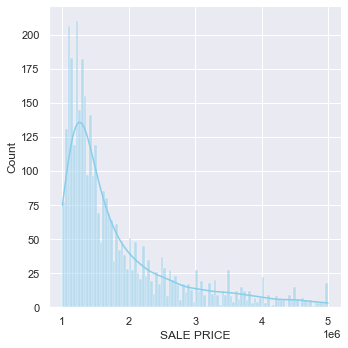

In [213]:
ax = sns.displot(
    df_pd,
    kde=True,
    bins=100,
    color='skyblue')

**Conclusion**

Distribusi diatas merupakan Poisson Distribution dikarenakan menggunakan data diskrit dan juga dikarenakan pada data ini ingin dicari banyaknya properti terjual berdasarkan harga. Pada hasil grafik tersebut dapat dilihat bahwa properti dengan harga dari \\$1,000,000 - \\$1,500,000 memiliki kenaikan jumlah terjual, dan dari \\$1,500,000 - \\$5,000,000 memiliki jumlah terjual yang makin menurun. Dari ini bisa disimpulkan bahwa semakin mahal harga properti maka semakin sedikit jumlah properti tersebut yang terjual.

# H. Confidence Intervals

**Question**\
Dari hasil-hasil sebelumnya, 95% kemungkinan bahwa Manhattan menjual properti dengan harga yang mahal. Berapakah true mean harga properti pada Manhattan?

**Pre-processing**

In [228]:
#Ambil mean, standar deviasi, dan size dari 'SALE PRICE' berdasarkan 'BOROUGH'
df_ci = df.groupby('BOROUGH').agg({'SALE PRICE':[np.mean, np.std, np.size]})

(13108941.549536305, 23998615.19946768)

**Statistical Method**

In [229]:
mean = df_ci.loc['Manhattan']['SALE PRICE']['mean'] #Ambil nilai mean pada Manhattan
sd = df_ci.loc['Manhattan']['SALE PRICE']['std'] #Ambil nilai std pada Manhattan
n = df_ci.loc['Manhattan']['SALE PRICE']['size'] #Ambil nilai size pada Manhattan
z = 1.96 #Diambil berdasarkan tingkat confidence sebesar 95%

#Mencari standar error
se = sd / np.sqrt(n)

#Mencari CI
lcb = mean - z * se
ucb = mean + z * se
lcb,ucb

(13108941.549536305, 23998615.19946768)

**Conclusion**

True mean harga properti pada Manhattan berada diantara \\$13,108,941 - \\$23,998,615

# I. Hypothesis Testing

**Question**\
Dengan mempertimbangkan data dan hasil sebelumnya, apakah wilayah Bronx memiliki rata - rata harga properti yang jauh lebih tinggi dibandingkan wilayah Brooklyn?\
Null Hypothesis        : μ1 = μ2\
Alternative Hypothesis : μ1 ≠ μ2

**Pre-processing**

In [237]:
df_bronx = df[df['BOROUGH'] == 'Bronx']
df_brooklyn = df[df['BOROUGH'] == 'Brooklyn']

n1 = len(df_bronx)
mu1 = df_bronx['SALE PRICE'].mean()
sd1 = df_bronx['SALE PRICE'].std()

n2 = len(df_brooklyn)
mu2 = df_brooklyn['SALE PRICE'].mean()
sd2 = df_brooklyn['SALE PRICE'].std()

sm.stats.ztest(df_bronx['SALE PRICE'], df_brooklyn['SALE PRICE'], alternative='two-sided')

(-5.346661980448331, 8.959110455070448e-08)

**Conclusion**

Karena p-value nya sangat kecil, dapat direject Null Hypothesis nya dan dapat disimpulkan bahwa rata - rata harga properti pada Bronx dan Brooklyn memiliki perbedaan yang signifikan.

# Overall Analysis

Dari hasil - hasil yang sudah didapatkan dapat disimpulkan bahwa :
1. Manhattan memiliki harga properti yang tertinggi.
2. Bronx dan Brooklyn ternyata memiliki perbedaan rata - rata harga yang signifikan.
3. Pada tahun 2017, properti dengan harga sekitaran \\$1,000,000 - \\$5,000,000 terjual paling banyak pada harga \\~\\$1,500,000.
4. Properti yang dibangun pada tahun 1960an memiliki rata - rata harga jual yang tinggi.